<a href="https://colab.research.google.com/github/nisargdoshi9/woc4.0-ml-sentiment-analysis-nisarg/blob/main/Final_Project_Tweet_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [119]:
COLS=['text','brand','emotion']
df = pd.read_csv(r"/content/judgetweets.csv",encoding='ISO-8859-1',names=COLS)

In [120]:
df = df.drop(df.index[0])
df.head()

,text,brand,emotion
1,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
2,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
3,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
4,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
5,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [121]:
df.columns

Index(['text', 'brand', 'emotion'], dtype='object')

In [122]:
len(df)

9093

In [123]:
df.shape

(9093, 3)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 1 to 9093
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     9092 non-null   object
 1   brand    3291 non-null   object
 2   emotion  9093 non-null   object
dtypes: object(3)
memory usage: 284.2+ KB


In [125]:
df.dtypes

text       object
brand      object
emotion    object
dtype: object

In [126]:
np.sum(df.isnull())

text          1
brand      5802
emotion       0
dtype: int64

In [127]:
#df = df.dropna(how='any',axis=0) 
df.brand=df.brand.fillna('Unknown')

In [128]:
np.sum(df.isnull())

text       1
brand      0
emotion    0
dtype: int64

In [129]:
df.head()
df.shape

(9093, 3)

In [130]:
df.emotion.nunique()

4

In [131]:
lab = df.emotion.unique()
lab=np.sort(lab)
lab

array(["I can't tell", 'Negative emotion',
       'No emotion toward brand or product', 'Positive emotion'],
      dtype=object)

In [132]:
df.groupby('emotion').count()

,text,brand
emotion,,
I can't tell,156,156
Negative emotion,570,570
No emotion toward brand or product,5388,5389
Positive emotion,2978,2978


[Text(0, 0, "I can't tell"),
 Text(0, 0, 'Negative emotion'),
 Text(0, 0, 'No emotion toward brand or product'),
 Text(0, 0, 'Positive emotion')]

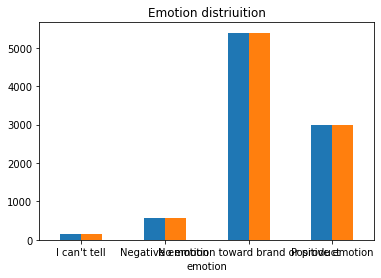

In [133]:
ax=df.groupby('emotion').count()
pl=ax.plot(kind='bar',title='Emotion distriuition',legend=False)
pl.set_xticklabels(lab,rotation=0)

In [134]:
#df.drop(df.index[6])

In [135]:
# for i in range(len(df.emotion)):
#   df['Num_emotion']=None

# for i in range(len(df.emotion)):
#   if df.emotion[i]=='I can\'t tell':
#     df['Num_emotion']=None
#   elif df.emotion[i]=='Negative emotion':
#     df['Num_emotion']=0
#   elif df.emotion[i]=='No emotion toward brand or product':
#     df['Num_emotion']=1
#   elif df.emotion[i]=='Positive emotion':
#     df['Num_emotion']=2


In [136]:
df.emotion = df.emotion.replace({"I can't tell":0, 'Negative emotion':1,
       'No emotion toward brand or product':2, 'Positive emotion':3})

In [137]:
df.emotion

1       1
2       3
3       3
4       1
5       3
       ..
9089    3
9090    2
9091    2
9092    2
9093    2
Name: emotion, Length: 9093, dtype: int64

In [138]:
text,brand,emotion=list(df.text),list(df.brand),list(df.emotion)

In [139]:
df_pos=df[df.emotion==3].iloc[:570]
df_neutral=df[df.emotion==2].iloc[:570]
df_neg=df[df.emotion==1]

In [140]:
df_neg

,text,brand,emotion
1,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,1
4,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,1
18,I just noticed DST is coming this weekend. How...,iPhone,1
39,@mention - False Alarm: Google Circles Not Co...,Google,1
65,Again? RT @mention Line at the Apple store is ...,Unknown,1
...,...,...,...
8974,Google guy at #sxsw talk is explaining how he ...,Unknown,1
8982,I think my effing hubby is in line for an #iPa...,iPad,1
9009,I'm pretty sure the panelist that thinks &quot...,Apple,1
9044,Hey is anyone doing #sxsw signing up for the g...,Unknown,1


In [141]:
final = pd.concat([df_pos,df_neutral,df_neg],axis=0)

In [142]:
df_pos.head()

,text,brand,emotion
2,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,3
3,@swonderlin Can not wait for #iPad 2 also. The...,iPad,3
5,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,3
8,"#SXSW is just starting, #CTIA is around the co...",Android,3
9,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,3


In [143]:
final.sample(5)

,text,brand,emotion
452,ÛÏ@mention Download 20+ FREE tracks from the ...,Unknown,2
851,Getting a look at Google's Impact Dashboard fo...,Unknown,2
790,Google to Launch Major New Social Network Call...,Unknown,2
206,Wandering 6th street with the girls. Stopped f...,Unknown,2
128,I can haz #iPad2 ifrom #SxSW Gr8 {link},iPad,3


In [144]:
final['text']=final['text'].str.lower()

In [145]:
final['text'].tail()

8974    google guy at #sxsw talk is explaining how he ...
8982    i think my effing hubby is in line for an #ipa...
9009    i'm pretty sure the panelist that thinks &quot...
9044    hey is anyone doing #sxsw signing up for the g...
9081    diller says google tv &quot;might be run over ...
Name: text, dtype: object

In [146]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [147]:
print(stop_words)

{'but', 'ourselves', 'as', 'all', 'this', 'aren', 'ain', "you'll", 'herself', 'between', 'there', "shouldn't", 'too', 'hers', 'those', 'on', "mightn't", 'after', 'yourself', 'above', 'some', 'when', 'the', "didn't", "hasn't", 'under', "weren't", 'where', 'of', 'into', 'didn', 't', 'up', 'have', "should've", "wasn't", 'before', 'ours', 'why', 'or', 'shan', 'won', 'any', 'being', 'himself', 'then', 'my', 'than', 'will', 'don', 'been', 'out', 'they', 'until', "shan't", 'ma', 'isn', 've', 'y', 'own', 'were', 'weren', "won't", 'how', 'having', 'about', 'mightn', 'themselves', 'more', 'them', "haven't", 'mustn', 'was', 'myself', "doesn't", 'below', 'each', 'over', 'yours', 'by', 'at', 'hasn', 'what', 'with', 'm', 'down', 'doing', 'me', 'against', 'can', 'theirs', 'doesn', "hadn't", 'haven', 'to', 'because', "aren't", "you've", "you're", 'a', 'their', 'll', 'is', 'few', 'an', 'be', 'o', 'do', 'itself', 'needn', 'while', 'not', "don't", 'does', 'most', 'further', 'who', 'such', 'just', 'that',

In [148]:
type(str(text).split())

list

In [149]:
def cleaning_stopwords(text):
  return " ".join([w for w in str(text).split() if w not in stop_words])
final['text']=final['text'].apply(lambda text: cleaning_stopwords(text))
final['text'].head()

2    @jessedee know @fludapp ? awesome ipad/iphone ...
3           @swonderlin wait #ipad 2 also. sale #sxsw.
5    @sxtxstate great stuff fri #sxsw: marissa maye...
8    #sxsw starting, #ctia around corner #googleio ...
9    beautifully smart simple idea rt @madebymany @...
Name: text, dtype: object

In [150]:
final.text[13]

'foursquare ups game, time #sxsw http://j.mp/grn7pk) - still prefer @gowalla far, best looking android app date.'

In [151]:
import re
final['text']  = final['text'].str.replace('http\S+|www.\S+', '', case=False)

#final['nourltext'] = df['text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [152]:
final.loc[13]['text']

'foursquare ups game, time #sxsw  - still prefer @gowalla far, best looking android app date.'

In [153]:
final['text']=final['text'].str.lower()
final.loc[13]['text']
final.text

2       @jessedee know @fludapp ? awesome ipad/iphone ...
3              @swonderlin wait #ipad 2 also. sale #sxsw.
5       @sxtxstate great stuff fri #sxsw: marissa maye...
8       #sxsw starting, #ctia around corner #googleio ...
9       beautifully smart simple idea rt @madebymany @...
                              ...                        
8974    google guy #sxsw talk explaining made realisti...
8982    think effing hubby line #ipad 2. someone point...
9009    i'm pretty sure panelist thinks &quot;apple dr...
9044    hey anyone #sxsw signing group texting app, gr...
9081    diller says google tv &quot;might run playstat...
Name: text, Length: 1710, dtype: object

In [154]:
#for i in range(0,len(final['text'])):
final['text']  = final['text'].str.replace(r'[^a-zA-Z\s:]', '', case=False)
final.text[13]

  #df['text'][i] = re.sub(r'[^a-zA-Z\s:]', ' ', df['text'][i], flags=re.MULTILINE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


'foursquare ups game time sxsw   still prefer gowalla far best looking android app date'

In [155]:
final['text']=final['text'].str.lower()
final['text']
np.sum(final.isnull())

text       0
brand      0
emotion    0
dtype: int64

In [156]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [157]:
final.text
final.isna

<bound method DataFrame.isna of                                                    text  ... emotion
2     jessedee know fludapp  awesome ipadiphone app ...  ...       3
3                  swonderlin wait ipad  also sale sxsw  ...       3
5     sxtxstate great stuff fri sxsw: marissa mayer ...  ...       3
8     sxsw starting ctia around corner googleio hop ...  ...       3
9     beautifully smart simple idea rt madebymany th...  ...       3
...                                                 ...  ...     ...
8974  google guy sxsw talk explaining made realistic...  ...       1
8982  think effing hubby line ipad  someone point to...  ...       1
9009  im pretty sure panelist thinks quotapple drown...  ...       1
9044  hey anyone sxsw signing group texting app grou...  ...       1
9081  diller says google tv quotmight run playstatio...  ...       1

[1710 rows x 3 columns]>

In [158]:
ind=[i for i in range(0,len(final.text))]
# final = final.reindex(ind)
# np.sum(final.isnull())
final['ind']=ind
final.set_index('ind',inplace=True)

In [159]:
final

,text,brand,emotion
ind,,,
0,jessedee know fludapp awesome ipadiphone app ...,iPad or iPhone App,3
1,swonderlin wait ipad also sale sxsw,iPad,3
2,sxtxstate great stuff fri sxsw: marissa mayer ...,Google,3
3,sxsw starting ctia around corner googleio hop ...,Android,3
4,beautifully smart simple idea rt madebymany th...,iPad or iPhone App,3
...,...,...,...
1705,google guy sxsw talk explaining made realistic...,Unknown,1
1706,think effing hubby line ipad someone point to...,iPad,1
1707,im pretty sure panelist thinks quotapple drown...,Apple,1


In [160]:
final['toktext']=[0 for x in final['text']]
for i in range(len(final['text'])):
  final['toktext'][i]=word_tokenize(str(final['text'][i]))
#final.toktext[8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [161]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
final['stemtext']=[[] for x in final.toktext]
for i in range(0,len(final.toktext)):
  for w in final.toktext[i]:
    final['stemtext'][i].append(ps.stem(w))
  final['stemtext'][i]=" ".join(final['stemtext'][i])

final.stemtext

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


ind
0       jessede know fludapp awesom ipadiphon app like...
1                     swonderlin wait ipad also sale sxsw
2       sxtxstate great stuff fri sxsw : marissa mayer...
3       sxsw start ctia around corner googleio hop ski...
4       beauti smart simpl idea rt madebymani thenextw...
                              ...                        
1705    googl guy sxsw talk explain made realist twitt...
1706    think ef hubbi line ipad someon point toward l...
1707    im pretti sure panelist think quotappl drown s...
1708    hey anyon sxsw sign group text app groupm got ...
1709    diller say googl tv quotmight run playstat xbo...
Name: stemtext, Length: 1710, dtype: object

In [162]:
final

,text,brand,emotion,toktext,stemtext
ind,,,,,
0,jessedee know fludapp awesome ipadiphone app ...,iPad or iPhone App,3,"[jessedee, know, fludapp, awesome, ipadiphone,...",jessede know fludapp awesom ipadiphon app like...
1,swonderlin wait ipad also sale sxsw,iPad,3,"[swonderlin, wait, ipad, also, sale, sxsw]",swonderlin wait ipad also sale sxsw
2,sxtxstate great stuff fri sxsw: marissa mayer ...,Google,3,"[sxtxstate, great, stuff, fri, sxsw, :, mariss...",sxtxstate great stuff fri sxsw : marissa mayer...
3,sxsw starting ctia around corner googleio hop ...,Android,3,"[sxsw, starting, ctia, around, corner, googlei...",sxsw start ctia around corner googleio hop ski...
4,beautifully smart simple idea rt madebymany th...,iPad or iPhone App,3,"[beautifully, smart, simple, idea, rt, madebym...",beauti smart simpl idea rt madebymani thenextw...
...,...,...,...,...,...
1705,google guy sxsw talk explaining made realistic...,Unknown,1,"[google, guy, sxsw, talk, explaining, made, re...",googl guy sxsw talk explain made realist twitt...
1706,think effing hubby line ipad someone point to...,iPad,1,"[think, effing, hubby, line, ipad, someone, po...",think ef hubbi line ipad someon point toward l...
1707,im pretty sure panelist thinks quotapple drown...,Apple,1,"[im, pretty, sure, panelist, thinks, quotapple...",im pretti sure panelist think quotappl drown s...


In [163]:
X=pd.concat([final[final['emotion']==1],final[final['emotion']==3]]).stemtext
y=pd.concat([final[final['emotion']==1],final[final['emotion']==3]]).emotion
#final.text[571]
#final.stemtext[8]

In [164]:
# data_neg = df_neg['text']
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(data_neg))
# plt.imshow(wc)

In [165]:
df_neg

,text,brand,emotion
1,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,1
4,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,1
18,I just noticed DST is coming this weekend. How...,iPhone,1
39,@mention - False Alarm: Google Circles Not Co...,Google,1
65,Again? RT @mention Line at the Apple store is ...,Unknown,1
...,...,...,...
8974,Google guy at #sxsw talk is explaining how he ...,Unknown,1
8982,I think my effing hubby is in line for an #iPa...,iPad,1
9009,I'm pretty sure the panelist that thinks &quot...,Apple,1
9044,Hey is anyone doing #sxsw signing up for the g...,Unknown,1


In [166]:
# data_pos = df_pos['text']
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(data_pos))
# plt.imshow(wc)

In [167]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=26105111)

In [168]:
# for i in range(0,len(X_train)):
#   X_train[i]=' '.join(X_train[i])
# X_train

In [169]:
temp = X_test

In [170]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  10394


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [171]:
X_train

ind
245     room full peopl wgood wifi sxsw run frostwir a...
337     technew omgjk : kiss ipad slap xoom link techn...
241     idea startupbu thing addict : link sxsw also a...
1704        hmmmtaxi magic iphon appear magic austin sxsw
1571    rt mention fan new sxsw trend audienc share op...
                              ...                        
1389    mention im go sxsw let meet up cant use mentio...
1525    rt mention best thing ive heard weekend sxsw q...
46      fast fun amp futur : mention googl present sxs...
263     cool iphon app launch sxsw flypost : commun bu...
1553    rt mention yet walk confer room look like appl...
Name: stemtext, Length: 1083, dtype: object

In [172]:

X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [173]:
print(X_train)

  (0, 10206)	0.2111749269057772
  (0, 10066)	0.2111749269057772
  (0, 10064)	0.1775020569129992
  (0, 10029)	0.2111749269057772
  (0, 10028)	0.2111749269057772
  (0, 9804)	0.2111749269057772
  (0, 9801)	0.19551793399255818
  (0, 8803)	0.2023573657653809
  (0, 8571)	0.031134855369785976
  (0, 7890)	0.2111749269057772
  (0, 7887)	0.1686844957726029
  (0, 7642)	0.2111749269057772
  (0, 7637)	0.1686844957726029
  (0, 7598)	0.2023573657653809
  (0, 7596)	0.16623115739548672
  (0, 6749)	0.2111749269057772
  (0, 6747)	0.17135142642273832
  (0, 6678)	0.2111749269057772
  (0, 6651)	0.12886099528956405
  (0, 5108)	0.2111749269057772
  (0, 5050)	0.0660984578493785
  (0, 3015)	0.2111749269057772
  (0, 3012)	0.18992971133919004
  (0, 2997)	0.2023573657653809
  (0, 2996)	0.2023573657653809
  :	:
  (1082, 9875)	0.2351583030595853
  (1082, 9872)	0.1825808124478756
  (1082, 9246)	0.2351583030595853
  (1082, 9231)	0.15229594400737892
  (1082, 8571)	0.03467087623537464
  (1082, 7623)	0.09250618577616015


In [174]:
# def model_Evaluate(model):
#   # Predict values for Test dataset
#   y_pred = model.predict(X_test)
#   # Print the evaluation metrics for the dataset.
#   print(classification_report(y_test, y_pred))

In [175]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           1       0.90      0.61      0.73        31
           3       0.67      0.92      0.77        26

    accuracy                           0.75        57
   macro avg       0.79      0.77      0.75        57
weighted avg       0.80      0.75      0.75        57



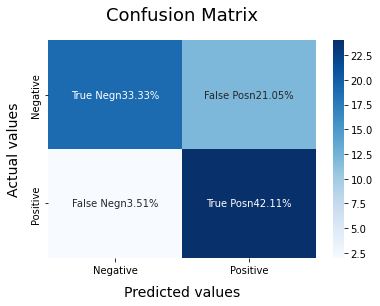

In [176]:
LRmodel = LogisticRegression(C=5,max_iter=500,n_jobs=-1)
LRmodel.fit(X_train,y_train)
model_Evaluate(LRmodel)
y_pred = LRmodel.predict(X_test)

In [189]:
y_pred = LRmodel.predict(X_test[0])
print(final['text'][149])
print(y_pred)
#temp

impulsive buy  friends sxsw gt one too selling st gen gb g ipad
[3]
